# Data Science Blog Post Project - AirBnB Seattle

### Table of content
- [Project Detail](#detail)
- [Gathering Data](#gather)
- [Assessing Data](#assess)
- [Cleaning Data](#clean)
- [Questions](#questions)
- [Conclusion](#conclusion)

## Project Detail <a class="anchor" id="detail"></a>

> 

## Gathering Data <a class="anchor" id="gather"></a>
> 

In [1]:
import zipfile
from kaggle.api.kaggle_api_extended import KaggleApi
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 200)

%matplotlib inline

In [2]:
# api = KaggleApi()
# api.authenticate()
# file1 = api.dataset_download_files('airbnb/seattle', 'seattle')

In [3]:
# with zipfile.ZipFile('seattle/seattle.zip', 'r') as zip_ref:
#     zip_ref.extractall('seattle')

## Assessing Data <a class="anchor" id="assess"></a>
> 

In [4]:
seattle_calendar = pd.read_csv('seattle/calendar.csv')
seattle_listings = pd.read_csv('seattle/listings.csv')
seattle_reviews = pd.read_csv('seattle/reviews.csv')

In [5]:
seattle_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [6]:
seattle_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [7]:
seattle_calendar.duplicated().sum()

0

In [8]:
seattle_calendar.nunique()

listing_id    3818
date           365
available        2
price          669
dtype: int64

In [9]:
print("Number of NaN values:{}".format(
    seattle_calendar['price'].isnull().sum()))
print("Percentage of NaN values:{:2.0%}".format(
    seattle_calendar['price'].isnull().sum() / seattle_calendar.shape[0]))

Number of NaN values:459028
Percentage of NaN values:33%


In [10]:
seattle_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [11]:
seattle_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,"Make your self at home in this charming one-bedroom apartment, centrally-located on the west side of Queen Anne hill. This elegantly-decorated, completely private apartment (bottom unit of a dup...","Make your self at home in this charming one-bedroom apartment, centrally-located on the west side of Queen Anne hill. This elegantly-decorated, completely private apartment (bottom unit of a dup...",none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/cfe47d69_original.jpg?interpolation=lanczos-none&size=large_cover&output-format=jpg&output-quality=70,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a small landscape business. My life revolves around beauty wherever I find it or create it. I grew up in Seattle and love this city for the people, it's ...",within a few hours,96%,100%,f,"https://a0.muscache.com/ac/users/956883/profile_pic/1318103129/original.jpg?interpolation=lanczos-none&crop=w:w;*,*&crop=h:h;*,*&resize=50:*&output-format=jpg&output-quality=70","https://a0.muscache.com/ac/users/956883/profile_pic/1318103129/original.jpg?interpolation=lanczos-none&crop=w:w;*,*&crop=h:h;*,*&resize=225:*&output-format=jpg&output-quality=70",Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air Conditioning"",Kitchen,Heating,""Family/Kid Friendly"",Washer,Dryer}",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,"Chemically sensitive? We've removed the irritants triggering allergy or asthma attacks, like carpeting, forced air & used pillows, all culprits that harbor fungus, mold & bacteria. No smoking, no...","Beautiful, hypoallergenic apartment in an extremely safe, quiet and pedestrian-friendly section of Queen Anne. A leafy-green location that puts the best of Seattle at your doorstep. Free WiFi, fr...","Chemically sensitive? We've removed the irritants triggering allergy or asthma attacks, like carpeting, forced air & used pillows, all culprits that h

In [12]:
seattle_listings.duplicated().sum()

0

In [13]:
seattle_listings.nunique()

id                                  3818
listing_url                         3818
scrape_id                              1
last_scraped                           1
name                                3792
summary                             3478
space                               3119
description                         3742
experiences_offered                    1
neighborhood_overview               2506
notes                               1999
transit                             2574
thumbnail_url                       3498
medium_url                          3498
picture_url                         3818
xl_picture_url                      3498
host_id                             2751
host_url                            2751
host_name                           1466
host_since                          1380
host_location                        120
host_about                          2011
host_response_time                     4
host_response_rate                    45
host_acceptance_

In [14]:
print("Number of NaN values:{}".format(
    seattle_listings['price'].isnull().sum()))
print("Percentage of NaN values:{:2.0%}".format(
    seattle_listings['price'].isnull().sum() / seattle_calendar.shape[0]))

Number of NaN values:0
Percentage of NaN values:0%


In [15]:
seattle_listings.select_dtypes(include=['float64','int64']).columns

Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'guests_included',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'license', 'calculated_host_listings_count',
       'reviews_per_month'],
      dtype='object')

In [16]:
seattle_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [17]:
seattle_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to everything!
1,7202016,39087409,2015-07-20,32440555,Frank,"Kelly has a great room in a very central location. \r\nBeautiful building , architecture and a style that we really like. \r\nWe felt guite at home here and wish we had spent more time.\r\nWent fo..."
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighborhood. This is the kind of apartment I wish I had!\r\n\r\nDidn't really get to meet Kelly until I was on my out, but she was always readily availabl..."
3,7202016,40813543,2015-08-02,33671805,George,"Close to Seattle Center and all it has to offer - ballet, theater, museum, Space Needle, restaurants of all ilk just blocks away, and the Metropolitan (probably the coolest grocer you'll ever find..."
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating in a great neighborhood. She has some great coffee and while I wasn't around much during my stay the time I spent interacting with her was very pleasa...


## Cleaning Data <a class="anchor" id="clean"></a>
> 

In [18]:
seattle_calendar_final = seattle_calendar.copy()

In [19]:
seattle_calendar_final.dropna(subset=['price'], inplace=True)

In [20]:
def get_month(row):
    ''' Get month from date '''
    return int(row['date'].split('-')[1])


def get_year(row):
    ''' Get year from date '''
    return int(row['date'].split('-')[0])

In [21]:
seattle_calendar_final['month'] = seattle_calendar_final.apply(
    get_month, axis=1)
seattle_calendar_final['year'] = seattle_calendar_final.apply(get_year, axis=1)

In [22]:
seattle_calendar_final['price'] = pd.to_numeric(
    seattle_calendar_final['price'].str.replace(r"[$,]", ""))

In [23]:
seattle_calendar_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   listing_id  934542 non-null  int64  
 1   date        934542 non-null  object 
 2   available   934542 non-null  object 
 3   price       934542 non-null  float64
 4   month       934542 non-null  int64  
 5   year        934542 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 49.9+ MB


In [24]:
seattle_calendar_final.head()

,listing_id,date,available,price,month,year
0,241032,2016-01-04,t,85.0,1,2016
1,241032,2016-01-05,t,85.0,1,2016
9,241032,2016-01-13,t,85.0,1,2016
10,241032,2016-01-14,t,85.0,1,2016
14,241032,2016-01-18,t,85.0,1,2016


In [81]:
seattle_listings_final = seattle_listings.copy()

In [82]:
columns = ['id', 'host_since', 'host_response_rate', 'host_acceptance_rate', 'neighbourhood_group_cleansed',
           'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities',
           'price', 'minimum_nights', 'review_scores_rating', 'review_scores_accuracy',
           'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication',
           'review_scores_location', 'review_scores_value', 'cancellation_policy']
columns_drop = seattle_listings_final.columns[~seattle_listings_final.columns.isin(
    columns)].values
columns_drop

array(['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_id',
       'host_url', 'host_name', 'host_location', 'host_about',
       'host_response_time', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed', 'city', 'state',
       'zipcode', 'market', 'smart_location', 'country_code', 'country',
       'latitude', 'longitude', 'is_location_exact', 'bed_type',
       'square_feet', 'weekly_price', 'monthly_price', 'security_deposit',
       'cleaning_fee', 'guests_included', 'extra_people',
       'maximum_nights', 'calendar_updated', 'has_availability',
       

In [83]:
seattle_listings_final.drop(columns=columns_drop, inplace=True)

In [84]:
seattle_listings_final['price'] = pd.to_numeric(
    seattle_listings_final['price'].str.replace(r"[$,]", ""))

In [85]:
seattle_listings_final.host_response_rate.fillna(0, inplace=True)
seattle_listings_final.host_acceptance_rate.fillna(0, inplace=True)
seattle_listings_final['host_response_rate'] = pd.to_numeric(
    seattle_listings_final['host_response_rate'].str.replace(r"[%]", ""))
seattle_listings_final['host_acceptance_rate'] = pd.to_numeric(
    seattle_listings_final['host_acceptance_rate'].str.replace(r"[%]", ""))

In [86]:
seattle_listings_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            3818 non-null   int64  
 1   host_since                    3816 non-null   object 
 2   host_response_rate            3295 non-null   float64
 3   host_acceptance_rate          3045 non-null   float64
 4   neighbourhood_group_cleansed  3818 non-null   object 
 5   property_type                 3817 non-null   object 
 6   room_type                     3818 non-null   object 
 7   accommodates                  3818 non-null   int64  
 8   bathrooms                     3802 non-null   float64
 9   bedrooms                      3812 non-null   float64
 10  beds                          3817 non-null   float64
 11  amenities                     3818 non-null   object 
 12  price                         3818 non-null   float64
 13  min

In [87]:
seattle_listings_final.head()

,id,host_since,host_response_rate,host_acceptance_rate,neighbourhood_group_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy
0,241032,2011-08-11,96.0,100.0,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air Conditioning"",Kitchen,Heating,""Family/Kid Friendly"",Washer,Dryer}",85.0,1,95.0,10.0,10.0,10.0,10.0,9.0,10.0,moderate
1,953595,2013-02-21,98.0,100.0,Queen Anne,Apartment,Entire home/apt,4,1.0,1.0,1.0,"{TV,Internet,""Wireless Internet"",Kitchen,""Free Parking on Premises"",""Buzzer/Wireless Intercom"",Heating,""Family/Kid Friendly"",Washer,Dryer,""Smoke Detector"",""Carbon Monoxide Detector"",""First Aid Kit...",150.0,2,96.0,10.0,10.0,10.0,10.0,10.0,10.0,strict
2,3308979,2014-06-12,67.0,100.0,Queen Anne,House,Entire home/apt,11,4.5,5.0,7.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""Air Conditioning"",Kitchen,""Free Parking on Premises"",""Pets Allowed"",""Pets live on this property"",Dog(s),Cat(s),""Hot Tub"",""Indoor Fireplace"",Heating,""Fa...",975.0,4,97.0,10.0,10.0,10.0,10.0,10.0,10.0,strict
3,7421966,2013-11-06,NaN,NaN,Queen Anne,Apartment,Entire home/apt,3,1.0,0.0,2.0,"{Internet,""Wireless Internet"",Kitchen,""Indoor Fireplace"",Heating,""Family/Kid Friendly"",Washer,Dryer,""Smoke Detector"",""Carbon Monoxide Detector"",""Safety Card"",""Fire Extinguisher"",Essentials,Shampoo}",100.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible
4,278830,2011-11-29,100.0,NaN,Queen Anne,House,Entire home/apt,6,2.0,3.0,3.0,"{TV,""Cable TV"",Internet,""Wireless Internet"",Kitchen,Heating,""Family/Kid Friendly"",""Smoke Detector"",""Carbon Monoxide Detector"",""First Aid Kit"",""Fire Extinguisher"",Essentials,Shampoo}",450.0,1,92.0,9.0,9.0,10.0,10.0,9.0,9.0,strict


## Questions <a class="anchor" id="questions"></a>
> 

### Question 1 <a class="anchor" id=""></a>
>

In [88]:
df_frequency = seattle_calendar_final.groupby(
    by=['year'])['month'].value_counts().reset_index(name='count')

In [89]:
df_frequency['period'] = df_frequency["year"].astype(
    str) + '_' + df_frequency["month"].astype(str).str.zfill(2)

In [90]:
df_avg_price = seattle_calendar_final.groupby(
    by=['year', 'month'])['price'].mean().reset_index(name='avg_price')

In [91]:
df_avg_price['period'] = df_avg_price["year"].astype(
    str) + '_' + df_avg_price["month"].astype(str).str.zfill(2)

In [92]:
df_question1 = df_frequency.merge(df_avg_price, on='period')
df_question1.drop(columns=['year_x', 'month_x',
                           'year_y', 'month_y'], inplace=True)

In [93]:
df_question1 = df_question1[df_question1['period']
                            != '2017_01'].sort_values('period')
df_question1

,count,period,avg_price
11,59239,2016_01,121.568409
10,73321,2016_02,124.293927
1,83938,2016_03,128.644488
8,76037,2016_04,135.097005
4,79971,2016_05,139.538183
6,77244,2016_06,147.473137
9,74222,2016_07,152.094150
7,76347,2016_08,150.656594
5,77246,2016_09,143.255949
2,82438,2016_10,137.031939


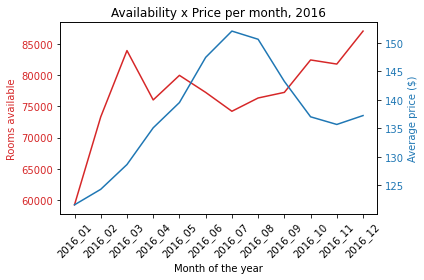

In [94]:
fig, ax1 = plt.subplots()

plt.xticks(rotation=45)
plt.title('Availability x Price per month, 2016')

color = 'tab:red'
ax1.set_xlabel('Month of the year')
ax1.set_ylabel('Rooms available', color=color)
ax1.plot(df_question1['period'], df_question1['count'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
# we already handled the x-label with ax1
ax2.set_ylabel('Average price ($)', color=color)
ax2.plot(df_question1['period'], df_question1['avg_price'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### Question 2 <a class="anchor" id=""></a>
>

In [99]:
df_question2 = seattle_listings_final[[
    'neighbourhood_group_cleansed', 'review_scores_location']]
df_question2 = df_question2.groupby('neighbourhood_group_cleansed')[
    'review_scores_location'].mean().reset_index().sort_values('review_scores_location', ascending=False)
df_question2

,neighbourhood_group_cleansed,review_scores_location
2,Capitol Hill,9.823529
6,Downtown,9.769737
0,Ballard,9.766839
16,West Seattle,9.765432
12,Queen Anne,9.751020
11,Other neighborhoods,9.637481
9,Magnolia,9.617021
3,Cascade,9.569231
4,Central Area,9.489028
10,Northgate,9.353846


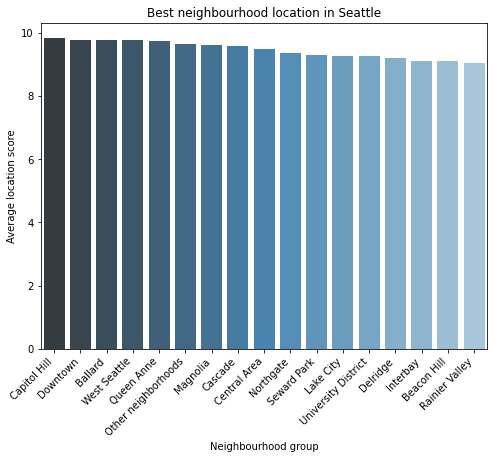

In [110]:
fig = plt.figure(figsize = [8,6])
ax = sb.barplot("neighbourhood_group_cleansed", y="review_scores_location", data=df_question2, palette="Blues_d")
plt.title('Best neighbourhood location in Seattle')
plt.ylabel('Average location score')
plt.xlabel('Neighbourhood group')
plt.xticks(rotation=45, horizontalalignment='right')
plt.show();

## Conclusion <a class="anchor" id="conclusion"></a>
> 